<a href="https://colab.research.google.com/github/harshithgowdakc/Online-Retail-Customer-Segmentation/blob/main/Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title : Extraction/identification of major topics & themes discussed in news articles.**

## **Problem Description**

**In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.**

## **Data Description**

---
**Attribute Information:**


*   **InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.**
*   **StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.**
*   **Description: Product (item) name. Nominal.**
*   **Quantity: The quantities of each product (item) per transaction. Numeric.**
*   **InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.**

*   **UnitPrice: Unit price. Numeric, Product price per unit in sterling.**

*   **CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.**

*   **Country: Country name. Nominal, the name of the country where each customer resides.**


# **Business Objective:**

**Customer segmentation is the practice of dividing a company’s customers into groups that reflect similarity among customers in each group. The goal of segmenting customers is to decide how to relate to customers in each segment in order to maximize the value of each customer to the business.**

**Customer segmentation has the potential to allow marketers to address each customer in the most effective way. Using the large amount of data available on customers (and potential customers), a customer segmentation analysis allows marketers to identify discrete groups of customers with a high degree of accuracy based on demographic, behavioral and other indicators.**

**Since the marketer’s goal is usually to maximize the value (revenue and/or profit) from each customer, it is critical to know in advance how any particular marketing action will influence the customer. Ideally, such “action-centric” customer segmentation will not focus on the short-term value of a marketing action, but rather the long-term customer lifetime value (CLV) impact that such a marketing action will have. Thus, it is necessary to group, or segment, customers according to their CLV.**

**Of course, it is always easier to make assumptions and use “gut feelings” to define rules which will segment customers into logical groupings, e.g., customers who came from a particular source, who live in a particular location or who bought a particular product/service. However, these high-level categorizations will seldom lead to the desired results.**

**It is obvious that some customers will spend more than others during their relationship with a company. The best customers will spend a lot for many years. Good customers will spend modestly over a long period of time, or will spend a lot over a short period of time. Others won’t spend too much and/or won’t stick around too long.**

**The right approach to segmentation analysis is to segment customers into groups based on predictions regarding their total future value to the company, with the goal of addressing each group (or individual) in the way most likely to maximize that future, or lifetime, value.**

# **Loading Dataset and Importing Modules**

In [1]:
#let's import the modules for EDA part
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from datetime import datetime
import datetime as dt

import warnings

**Mount the drive and import the datset**

In [2]:
#let's mount the google drive for import the dtaset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#load the Credit-Card-Default-Prediction data set from drive
df = pd.read_excel('/content/drive/MyDrive/Almabetter/Online Retail./Copy of Online Retail.xlsx')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [5]:
df.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [7]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [8]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [9]:
df.shape

(541909, 8)

In [10]:
df.nunique()

InvoiceNo      25900
StockCode       4070
Description     4223
Quantity         722
InvoiceDate    23260
UnitPrice       1630
CustomerID      4372
Country           38
dtype: int64

In [11]:
#Looking for the description of the dataset to get insights of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Quantity,541909.0,9.552250,218.081158,-80995.00,1.00,3.00,10.00,80995.0
UnitPrice,541909.0,4.611114,96.759853,-11062.06,1.25,2.08,4.13,38970.0
CustomerID,406829.0,15287.690570,1713.600303,12346.00,13953.00,15152.00,16791.00,18287.0


In [12]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<Axes: >

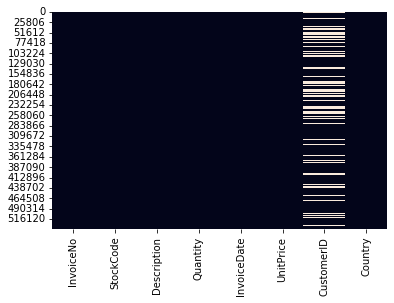

In [13]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

In [14]:
df['Description'].isnull().sum()

1454

In [15]:
df['CustomerID'].isnull().sum()

135080

**There is some null value present in our dataset like in CustomerID and Description.**

In [16]:
df.dropna().inplace = True

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [18]:
df.shape

(541909, 8)

<Axes: >

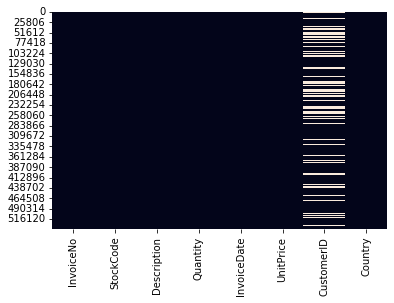

In [19]:
# Checking Null Value by plotting Heatmap
sns.heatmap(df.isnull(), cbar=False)

**After removeing null value in our dataset .it reduces to (406829, 8)**

In [20]:
df.duplicated().sum()

5268

In [21]:
df[df.duplicated()]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,2010-12-01 11:45:00,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,2010-12-01 11:45:00,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,2010-12-01 11:49:00,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,2011-12-09 11:34:00,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,2011-12-09 11:34:00,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


In [22]:
df = df.drop_duplicates()

In [23]:
df.duplicated().sum()

0

In [24]:
df.shape

(536641, 8)

**we have to drop some InvoiceNo which are starts with 'c' because 'c', it indicates a cancellation**

In [25]:
df['InvoiceNo'] = df['InvoiceNo'].astype('str')

In [26]:
# checking invoice no.
df[df['InvoiceNo'].str.contains('C')]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom


**convert invoice Data column into 'year','month','day','hour','minute','second'**

In [27]:
df['InvoiceDate_year']   =df['InvoiceDate'].dt.year
df['InvoiceDate_month']  =df['InvoiceDate'].dt.month
df['InvoiceDate_day']    =df['InvoiceDate'].dt.day
df['InvoiceDate_hour']   =df['InvoiceDate'].dt.hour
df['InvoiceDate_minute'] =df['InvoiceDate'].dt.minute
df['InvoiceDate_second'] =df['InvoiceDate'].dt.second

In [28]:
print("Columns and data types")
pd.DataFrame(df.dtypes).rename(columns = {0:'dtype'})

Columns and data types


,dtype
InvoiceNo,object
StockCode,object
Description,object
Quantity,int64
InvoiceDate,datetime64[ns]
UnitPrice,float64
CustomerID,float64
Country,object
InvoiceDate_year,int64
InvoiceDate_month,int64


In [29]:
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

In [30]:
df.shape

(536641, 14)

# **Exploratory Data Analysis**

**Why do we perform EDA?**

**An EDA is a thorough examination meant to uncover the underlying structure of a data set and is important for a company because it exposes trends, patterns, and relationships that are not readily apparent.**

# **Univariate Analysis**

**Why do you do univariate analysis?**

**The key objective of Univariate analysis is to simply describe the data to find patterns within the data.**

# **CustomerID**

**We have a certain amount of rows. Let us check if each row has a single customer or not. If not than how many customer ids we have.**

In [31]:
# let us see the unique ids of customers
print('The no. of customers = ',df['CustomerID'].nunique())

The no. of customers =  4372


**So we have around 392732 rows but only 4339 customers. Let us now see who is most active customer.**

In [32]:
# finding most active customer
active_customers=pd.DataFrame(df['CustomerID'].value_counts().sort_values(ascending=False).reset_index())
active_customers.rename(columns={'index':'CustomerID','CustomerID':'Count'},inplace=True)
active_customers

,CustomerID,Count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759
...,...,...
4367,15369.0,1
4368,13703.0,1
4369,14119.0,1
4370,16881.0,1


In [33]:
# top 5
active_customers.head()

,CustomerID,Count
0,17841.0,7812
1,14911.0,5898
2,14096.0,5128
3,12748.0,4459
4,14606.0,2759


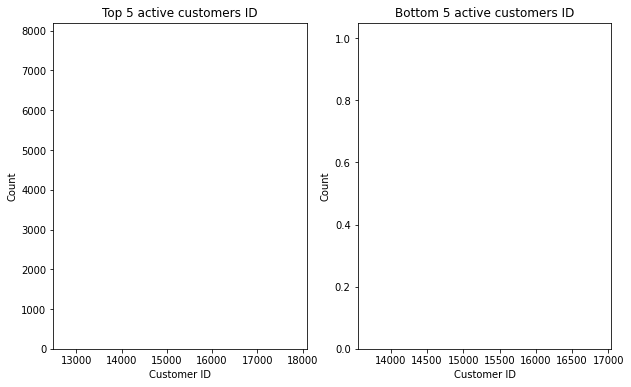

In [34]:
# visulizing
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.bar(active_customers['CustomerID'][:5],active_customers['Count'][:5])
plt.title('Top 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.subplot(1,2,2)
plt.bar(active_customers['CustomerID'][-5:],active_customers['Count'][-5:])
plt.title('Bottom 5 active customers ID')
plt.xlabel('Customer ID')
plt.ylabel('Count')
plt.show()

**The top 5 most active customers that have been regularly purchasing are having ids 17841, 14911, 14096, 12748, 14606. These customers can be considered as special customeres because it is very likely that they would buy more often.**

# **Analysis of Categorical Features**

In [35]:
categorical_columns=list(df.select_dtypes(['object']).columns)
categorical_features=pd.Index(categorical_columns)
categorical_features

Index(['InvoiceNo', 'StockCode', 'Description', 'Country'], dtype='object')

In [36]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0


# **Analysis of Description Variable**

In [37]:
Description_df=df['Description'].value_counts().reset_index()
Description_df.rename(columns={'index': 'Description_Name'}, inplace=True)
Description_df.rename(columns={'Description': 'Count'}, inplace=True)

In [38]:
Description_df

,Description_Name,Count
0,WHITE HANGING HEART T-LIGHT HOLDER,2357
1,REGENCY CAKESTAND 3 TIER,2189
2,JUMBO BAG RED RETROSPOT,2156
3,PARTY BUNTING,1720
4,LUNCH BAG RED RETROSPOT,1625
...,...,...
4218,rcvd be air temp fix for dotcom sit,1
4219,SET 12 COLOURING PENCILS DOILEY,1
4220,SET 36 COLOURING PENCILS DOILEY,1
4221,I LOVE LONDON MINI RUCKSACK,1


<Axes: title={'center': 'Top 5 Product Name'}, xlabel='Description_Name', ylabel='Count'>

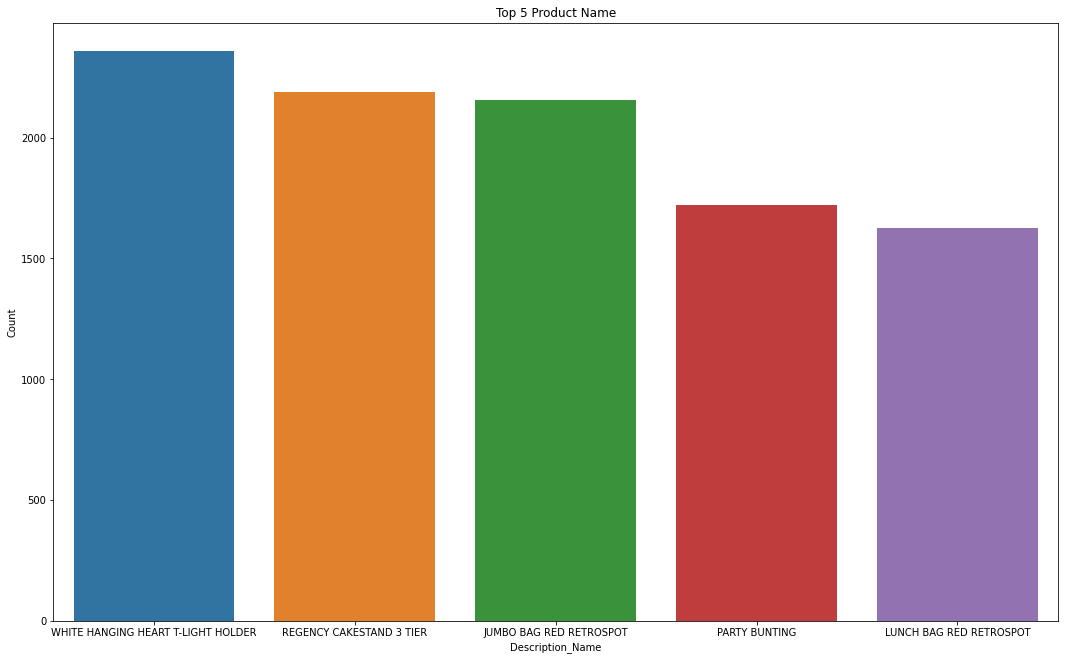

In [39]:
plt.figure(figsize=(18,11))
plt.title('Top 5 Product Name')
sns.barplot(x='Description_Name',y='Count',data=Description_df[:5])

In [40]:
df["Description"].value_counts().head()

WHITE HANGING HEART T-LIGHT HOLDER    2357
REGENCY CAKESTAND 3 TIER              2189
JUMBO BAG RED RETROSPOT               2156
PARTY BUNTING                         1720
LUNCH BAG RED RETROSPOT               1625
Name: Description, dtype: int64

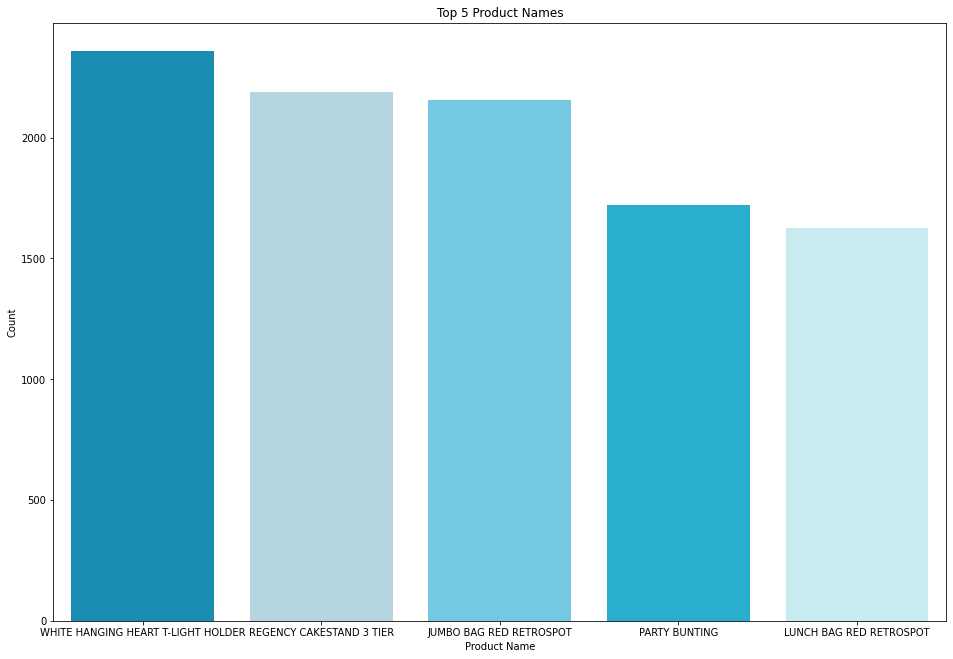

In [41]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df["Description"].value_counts().head().index, y=df["Description"].value_counts().head().values,
            palette=["#009ACD", "#ADD8E6", "#63D1F4", "#0EBFE9", "#C1F0F6"])
plt.title('Top 5 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

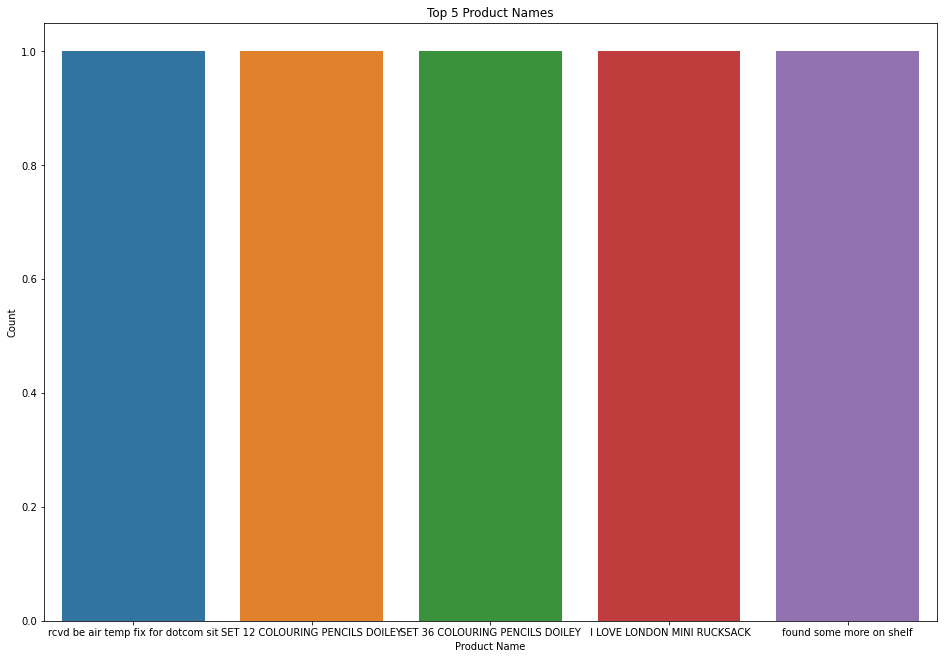

In [42]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df["Description"].value_counts().tail().index, y=df["Description"].value_counts().tail().values)
plt.title('Top 5 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

# **Analysis of StockCode Variable**

In [43]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0


In [44]:
df.StockCode.value_counts()

85123A    2301
22423     2192
85099B    2156
47566     1720
20725     1626
          ... 
72781        1
35015        1
72793        1
72789        1
90091        1
Name: StockCode, Length: 4070, dtype: int64

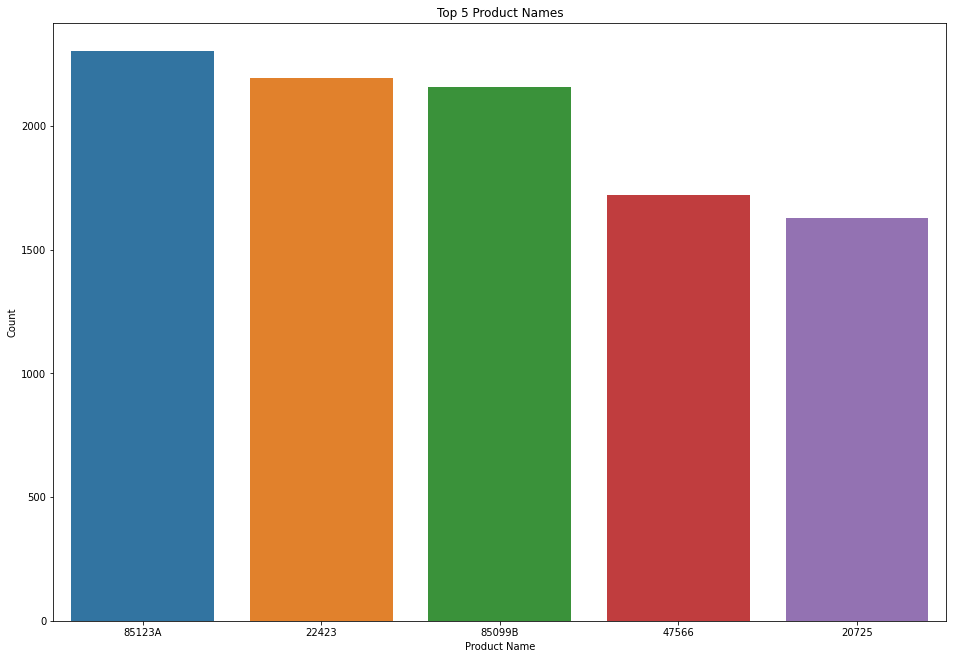

In [45]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df.StockCode.value_counts().head().index, y=df.StockCode.value_counts().head().values)
plt.title('Top 5 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

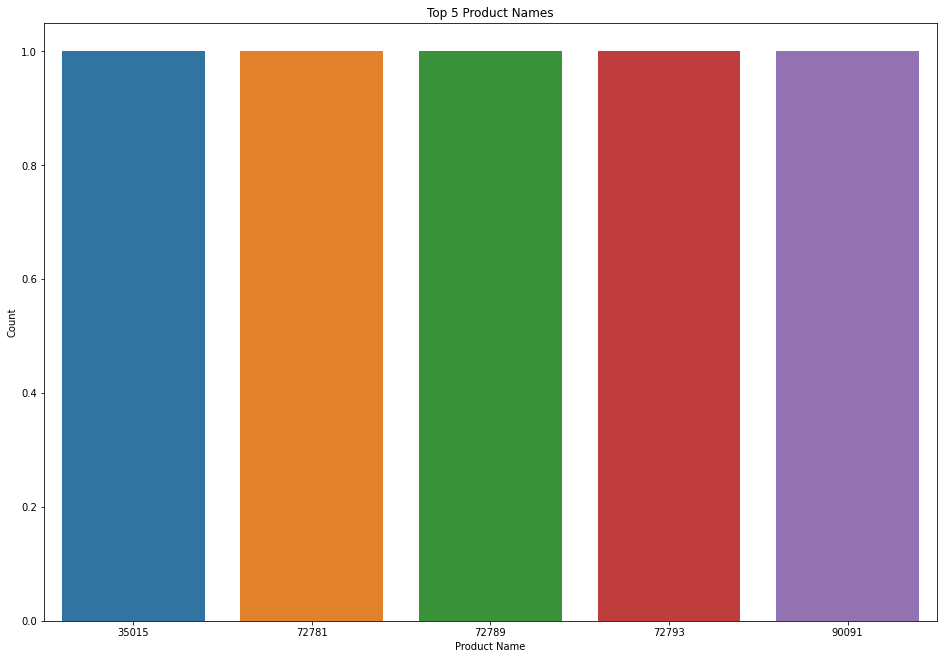

In [46]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df.StockCode.value_counts().tail().index, y=df.StockCode.value_counts().tail().values)
plt.title('Top 5 Product Names')
plt.xlabel('Product Name')
plt.ylabel('Count')
plt.show()

# **Analysis of country Variable**

In [49]:
df.Country.value_counts().head()

United Kingdom    490300
Germany             9480
France              8541
EIRE                8184
Spain               2528
Name: Country, dtype: int64

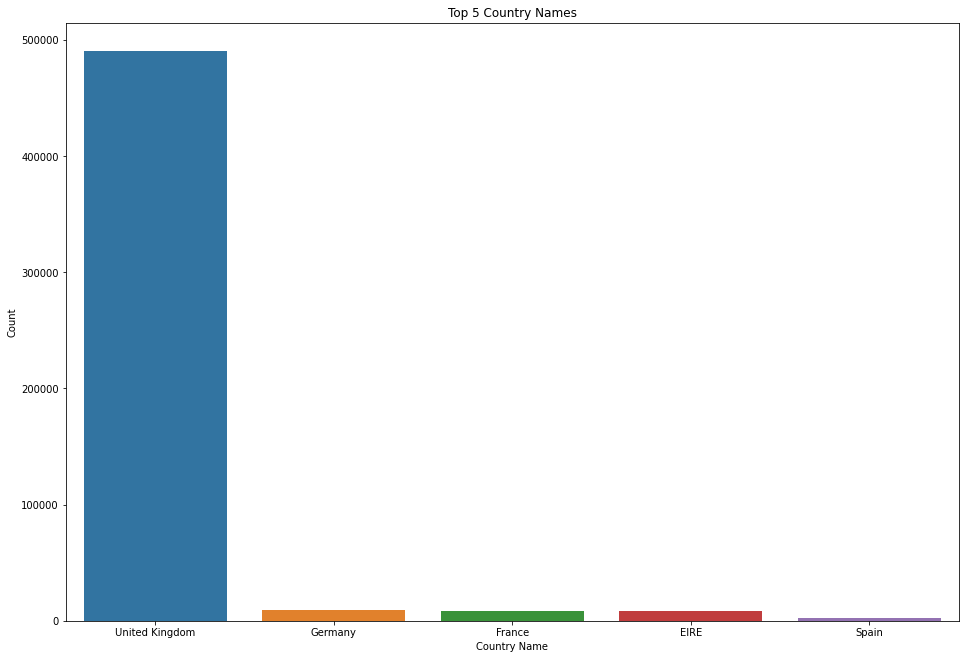

In [48]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df.Country.value_counts().head().index, y=df.Country.value_counts().head().values)
plt.title('Top 5 Country Names')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.show()

**From this graph we can see that most of the customers are from United Kingdom ,Germany ,France ,EIRE and Spain**

In [50]:
df.Country.value_counts().tail()

Lithuania         35
Brazil            32
Czech Republic    30
Bahrain           19
Saudi Arabia      10
Name: Country, dtype: int64

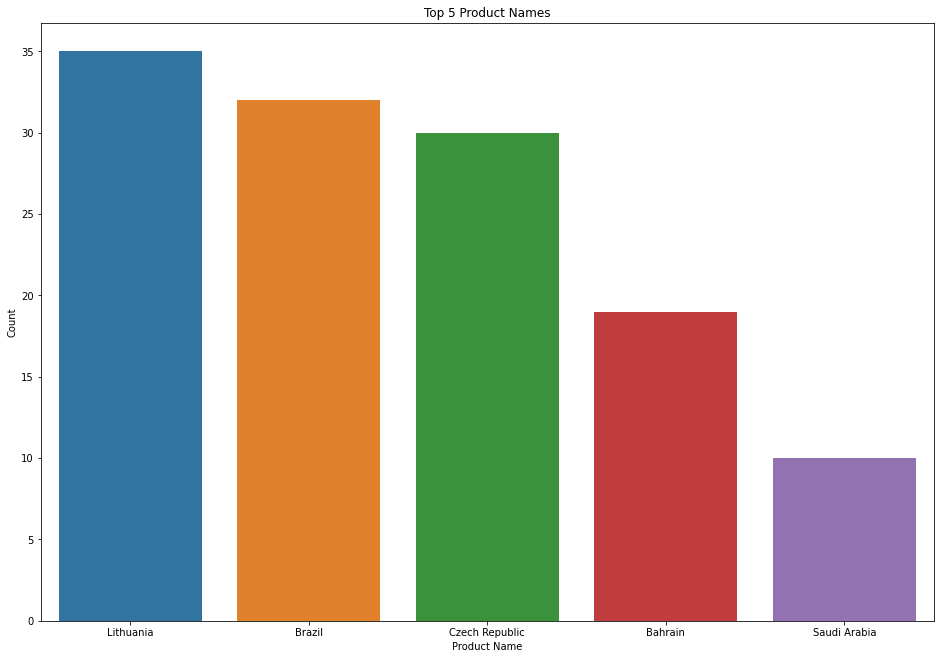

In [47]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x=df.Country.value_counts().tail().index, y=df.Country.value_counts().tail().values)
plt.title('Top 5 Country Names')
plt.xlabel('Country Name')
plt.ylabel('Count')
plt.show()

**From this graph we can see that least number of customers from Lithuania,Brazil, Czech Republic ,Bahrain and Saudi Arabia**

In [51]:
df[df['Country']=='United Kingdom']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541889,581585,22466,FAIRY TALE COTTAGE NIGHT LIGHT,12,2011-12-09 12:31:00,1.95,15804.0,United Kingdom,2011,12,9,12,31,0
541890,581586,22061,LARGE CAKE STAND HANGING STRAWBERY,8,2011-12-09 12:49:00,2.95,13113.0,United Kingdom,2011,12,9,12,49,0
541891,581586,23275,SET OF 3 HANGING OWLS OLLIE BEAK,24,2011-12-09 12:49:00,1.25,13113.0,United Kingdom,2011,12,9,12,49,0
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom,2011,12,9,12,49,0


In [52]:
df[df['Country']=='Saudi Arabia']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second
100810,544838,22915,ASSORTED BOTTLE TOP MAGNETS,12,2011-02-24 10:34:00,0.42,12565.0,Saudi Arabia,2011,2,24,10,34,0
100811,544838,22363,GLASS JAR MARMALADE,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100812,544838,22362,GLASS JAR PEACOCK BATH SALTS,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100813,544838,22361,GLASS JAR DAISY FRESH COTTON WOOL,6,2011-02-24 10:34:00,2.95,12565.0,Saudi Arabia,2011,2,24,10,34,0
100814,544838,22553,PLASTERS IN TIN SKULLS,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100815,544838,22555,PLASTERS IN TIN STRONGMAN,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100816,544838,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-02-24 10:34:00,1.65,12565.0,Saudi Arabia,2011,2,24,10,34,0
100817,544838,20781,GOLD EAR MUFF HEADPHONES,2,2011-02-24 10:34:00,5.49,12565.0,Saudi Arabia,2011,2,24,10,34,0
100818,544838,22969,HOMEMADE JAM SCENTED CANDLES,12,2011-02-24 10:34:00,1.45,12565.0,Saudi Arabia,2011,2,24,10,34,0
108127,C545507,22361,GLASS JAR DAISY FRESH COTTON WOOL,-5,2011-03-03 11:43:00,2.95,12565.0,Saudi Arabia,2011,3,3,11,43,0


# **Analysis Numeric Features**

In [53]:
numerical_columns=list(df.select_dtypes(['int64','float64']).columns)
numerical_features=pd.Index(numerical_columns)
numerical_features

Index(['Quantity', 'UnitPrice', 'CustomerID', 'InvoiceDate_year',
       'InvoiceDate_month', 'InvoiceDate_day', 'InvoiceDate_hour',
       'InvoiceDate_minute', 'InvoiceDate_second'],
      dtype='object')

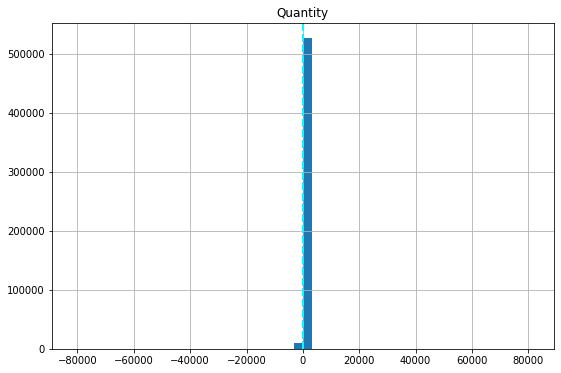

Skewness : -0.2639207787329176
Kurtosis : 118645.54455234332


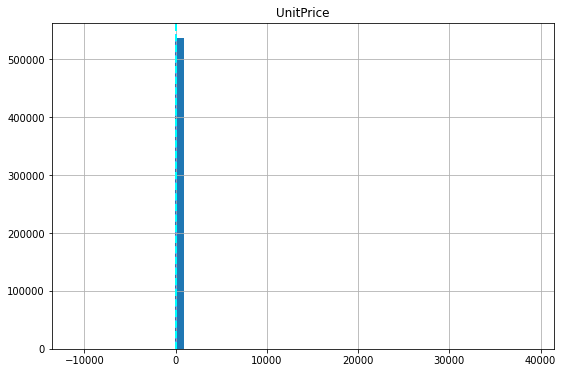

Skewness : 185.60044812920344
Kurtosis : 58433.135910585086


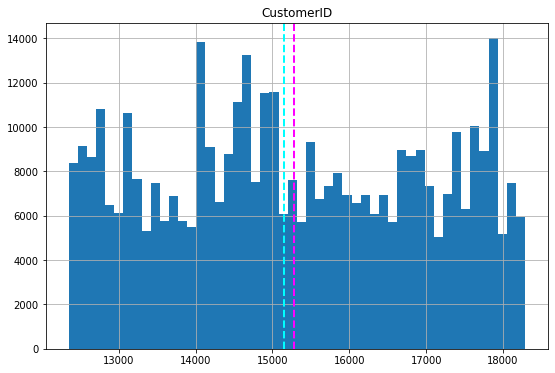

Skewness : 0.03421519250349164
Kurtosis : -1.179861259043713


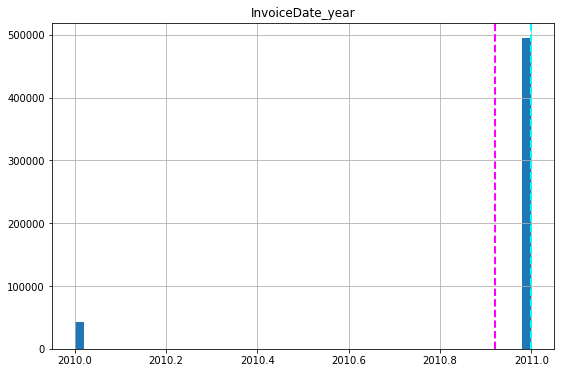

Skewness : -3.1413170786444153
Kurtosis : 7.867902311346793


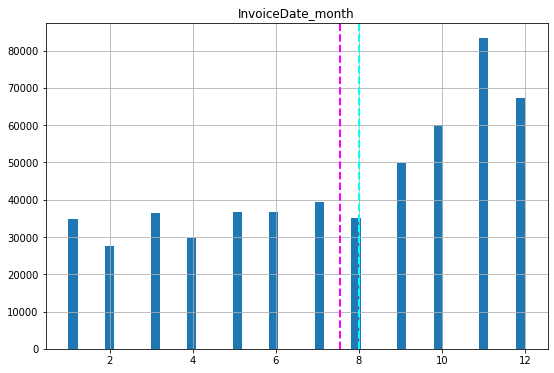

Skewness : -0.4112397637662981
Kurtosis : -1.121688905682585


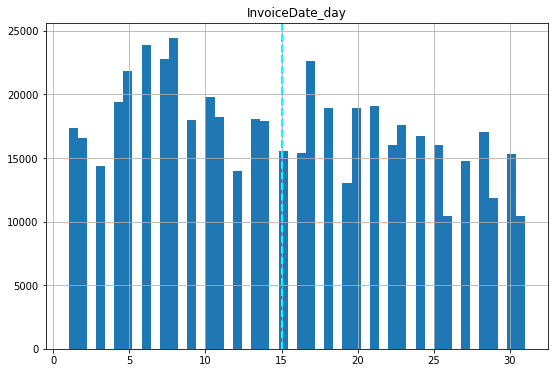

Skewness : 0.1425060392658862
Kurtosis : -1.1573667360751423


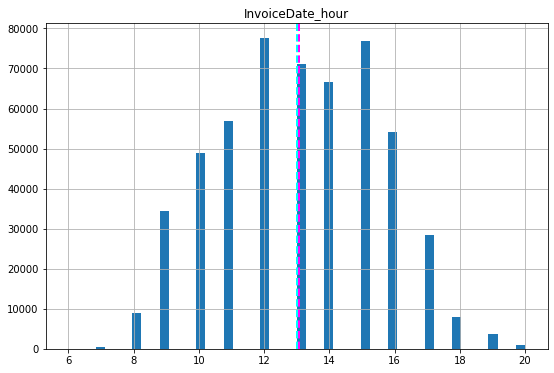

Skewness : 0.002850657774814659
Kurtosis : -0.6944981623468869


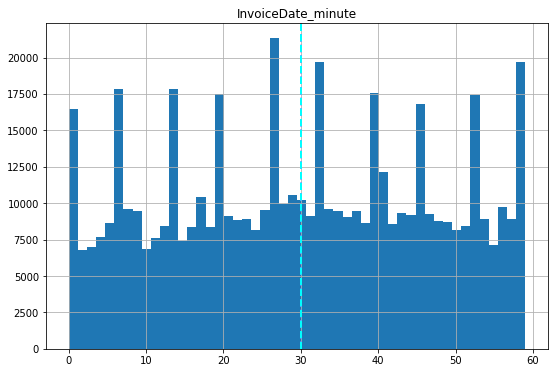

Skewness : -0.02534037213860687
Kurtosis : -1.136943576846362


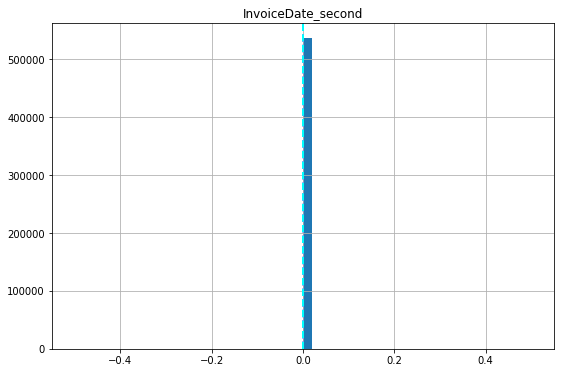

Skewness : 0
Kurtosis : 0


In [55]:
#plot a bar plot for each numerical feature count with Hist Plot (except car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  feature.hist(bins=50, ax=ax)
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

In [ ]:
#plot a bar plot for each numerical feature count with Dist Plot (except Car_ID)
for col in numerical_features:
  fig=plt.figure(figsize=(9,6))
  ax=fig.gca()
  feature= (df[col])
  sns.histplot(df[col])
  ax.axvline(feature.mean(),color='magenta', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(),color='cyan', linestyle='dashed', linewidth=2)
  ax.set_title(col)
  plt.show()
  print( "Skewness :",df[col].skew())
  print( "Kurtosis :",df[col].kurt())

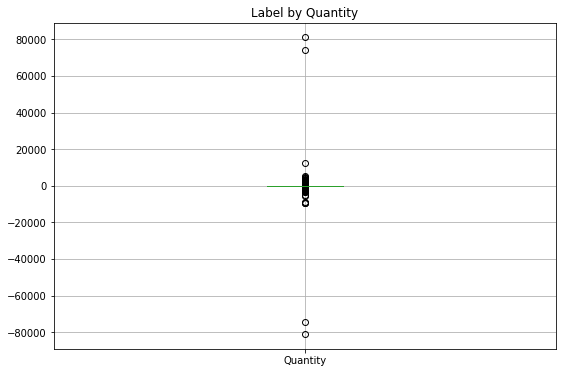

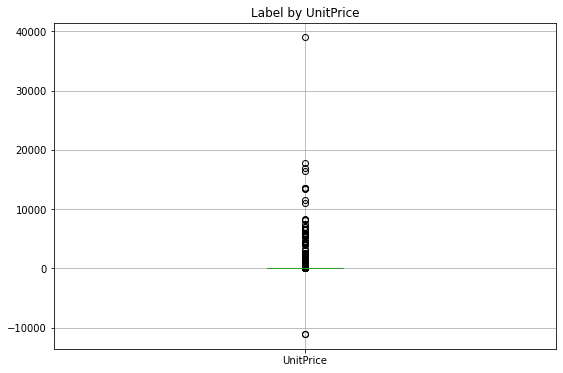

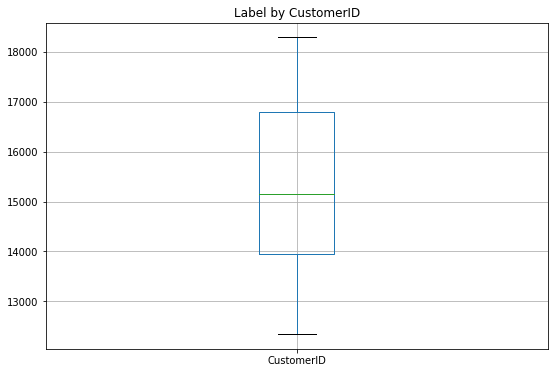

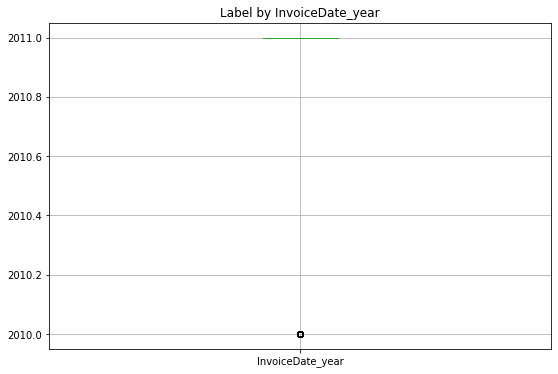

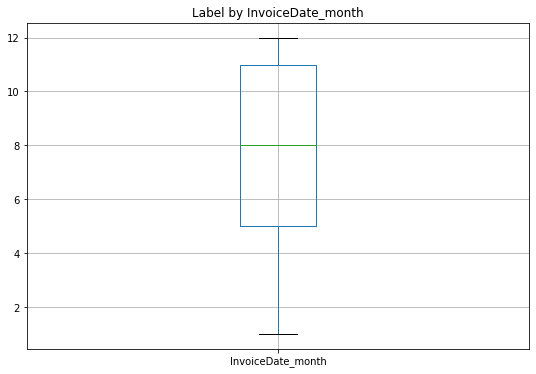

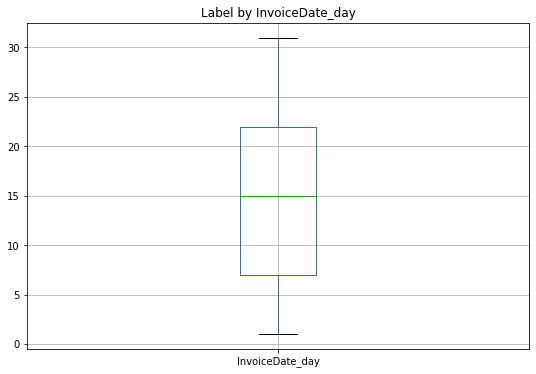

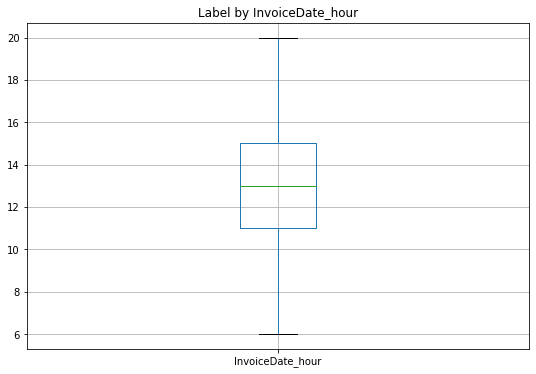

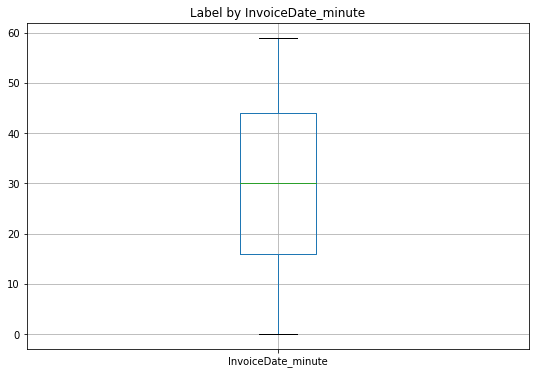

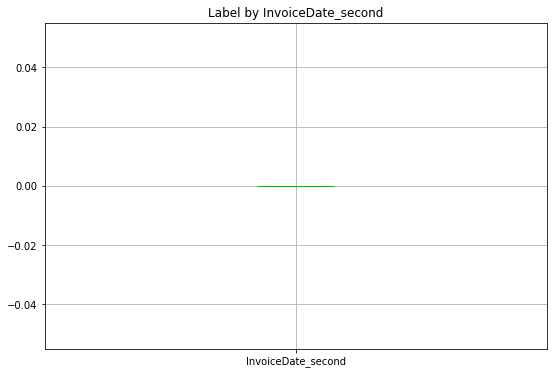

In [57]:
# plot a boxplot for the label by each numerical feature  

for col in numerical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    df.boxplot(col)
    ax.set_title('Label by ' + col)
    #ax.set_ylabel("Churn")
plt.show()

# **Correlation**

<Axes: >

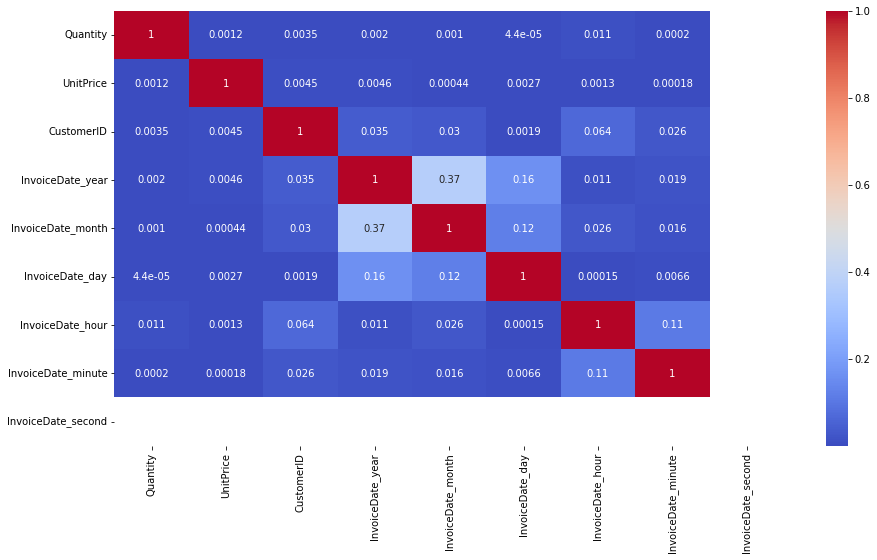

In [58]:
## Correlation
plt.figure(figsize=(15,8))
correlation= df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

# **Feature engineering**

In [59]:
df['Day']= df['InvoiceDate'].dt.day_name()


In [60]:
df['TotalAmount']= df['Quantity']*df['UnitPrice']

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,InvoiceDate_minute,InvoiceDate_second,Day,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,26,0,Wednesday,20.34


<ipython-input-69-e0e3242350ee>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['TotalAmount'],color="blue")


<Axes: title={'center': 'distribution of Amount'}, xlabel='TotalAmount', ylabel='Density'>

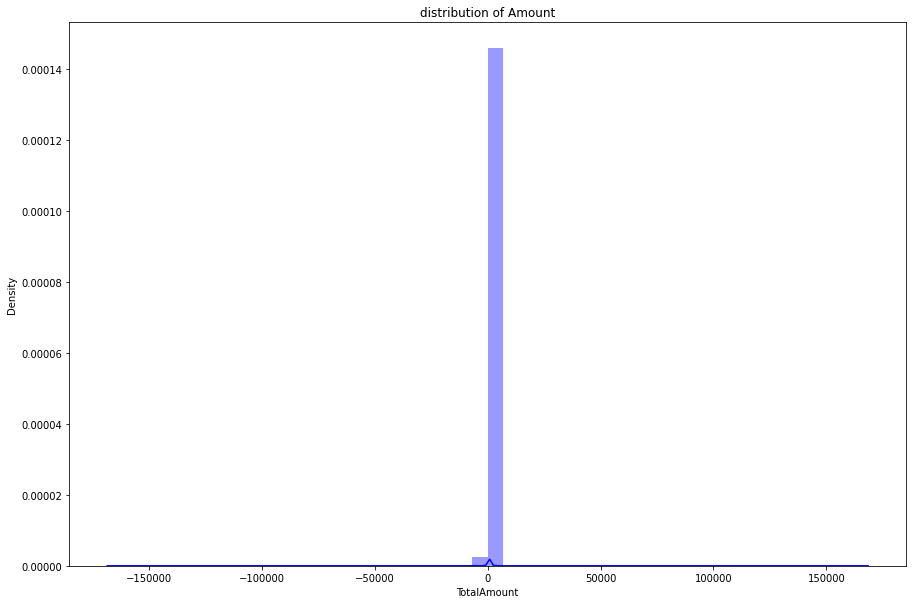

In [69]:
plt.figure(figsize=(15,10))
plt.title('distribution of Amount')
sns.distplot(df['TotalAmount'],color="blue")

In [70]:
df['TotalAmount'].describe()

count    536641.000000
mean         18.123861
std         380.656263
min     -168469.600000
25%           3.750000
50%           9.870000
75%          17.400000
max      168469.600000
Name: TotalAmount, dtype: float64

<Axes: >

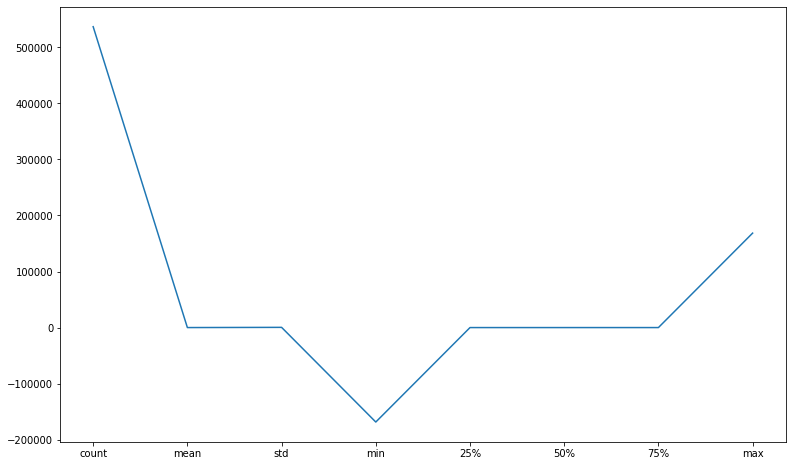

In [71]:
plt.figure(figsize=(13,8))
df['TotalAmount'].describe().plot()

In [ ]:
# Create a bar plot with different colors
plt.figure(figsize=(16, 11))
sns.barplot(x='Day_Name.value_counts()',y='Count',data=df)
plt.show()

**Most of the customers have purches the items in Thursday ,Wednesday and Tuesday**

In [ ]:
plt.figure(figsize=(13,8))
plt.title('Month')
sns.barplot(x='Month_Name',y='Count',data=df)